<a href="https://colab.research.google.com/github/Pabloabreu1277/Py_Montecarlo_PETRA4/blob/main/PyMontecarloPETRA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Método Monte Carlo com o Python
By Luiz Henrique Barbosa Filho 20 de dezembro de 2022
Revisão Pablo Ricardo de Abreu 28 de dezembro de 2022

Métodos de Monte Carlo são algoritmos computacionais que se baseiam em amostras aleatórias de uma distribuição para obter resultados numéricos . No post de hoje vamos criar essa distribuição com base em dois parâmetros: média e desvio padrão dos retornos, de forma a obter o preço esperado de um ativo usando o Python.

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importa as bibliotecas
import pandas as pd
import math
import numpy as np
import pandas_datareader.data as pdr
from matplotlib import pyplot as plt

import yfinance as yf
yf.pdr_override()

In [ ]:

# Ativos
#symbols = ['ITUB4.SA']
#Revisao para análise de outra ação 
symbols = ['PETR4.SA']
# Importa os preços
preco = pdr.get_data_yahoo(symbols)['Adj Close']
# Obtém o número de observações do tempo
tempo = (preco.index[-1] - preco.index[0]).days
# Média dos retornos
media_retorno = preco.pct_change().mean()
# Desvio padrão dos retornos
desvio_retorno = preco.pct_change().std()
# A partir dos inputs, iremos gerar os valores aleatórios da simulação
print ("Retorno esperado : ", str(round(media_retorno, 4)))
print ("Desvio padrão : ", str(round(desvio_retorno, 4)))

[*********************100%***********************]  1 of 1 completed
Retorno esperado :  0.0008
Desvio padrão :  0.0269


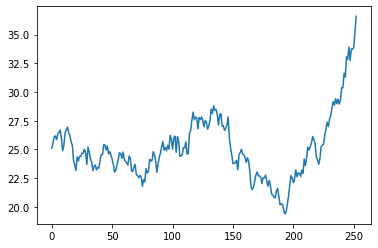

In [ ]:
# Gera valores aleatório para 1 ano em dias úteis (252 dias) assumindo distribuição normal
retorno_diario_sim = np.random.normal(media_retorno, desvio_retorno, 252) + 1
# A partir do valores aleatórios futuros dos retornos, aplicamos no último valor do preço da ação
price_series = [preco[-1]]
for j in retorno_diario_sim:
    price_series.append(price_series[-1] * j)
 
 
 
 
plt.plot(price_series)

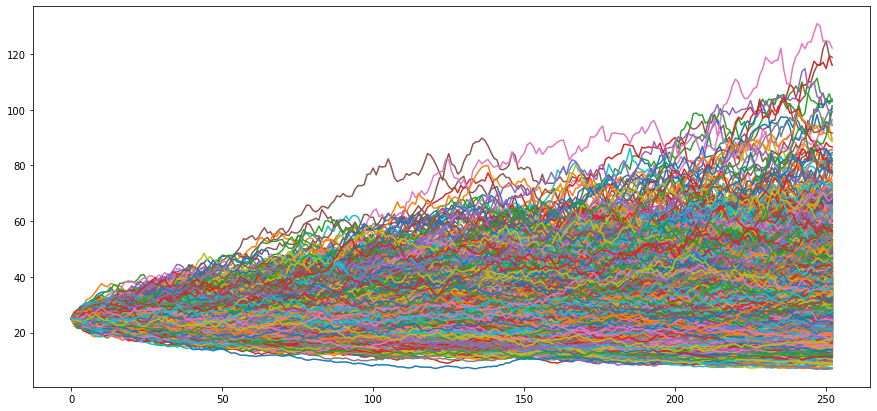

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

In [ ]:

plt.figure(figsize = (15, 7))
# Cria várias simulações
numero_processos = 3000
precos_fechamento = []
for i in range(numero_processos):
    retorno_diario = np.random.normal(media_retorno, desvio_retorno, 252) + 1
    serie_precos = [preco[-1]]
    for j in retorno_diario:
        serie_precos.append(serie_precos[-1] * j)
 
    # anexa o último valor do preço
    precos_fechamento.append(serie_precos[-1])
    # plota
    plt.plot(serie_precos)
plt.show()
plt.figure(figsize = (15, 7))

(array([ 17.,  89., 149., 210., 276., 332., 312., 243., 274., 229., 202.,
        139., 121.,  77.,  87.,  53.,  32.,  37.,  21.,  19.,  15.,  14.,
         14.,   3.,   7.,   6.,   4.,   3.,   2.,   1.,   1.,   1.,   3.,
          4.,   0.,   0.,   0.,   1.,   1.,   1.]),
 array([  6.98269295,   9.8604775 ,  12.73826204,  15.61604659,
         18.49383114,  21.37161568,  24.24940023,  27.12718478,
         30.00496933,  32.88275387,  35.76053842,  38.63832297,
         41.51610751,  44.39389206,  47.27167661,  50.14946116,
         53.0272457 ,  55.90503025,  58.7828148 ,  61.66059934,
         64.53838389,  67.41616844,  70.29395299,  73.17173753,
         76.04952208,  78.92730663,  81.80509117,  84.68287572,
         87.56066027,  90.43844482,  93.31622936,  96.19401391,
         99.07179846, 101.949583  , 104.82736755, 107.7051521 ,
        110.58293665, 113.46072119, 116.33850574, 119.21629029,
        122.09407483]),
 <a list of 40 Patch objects>)

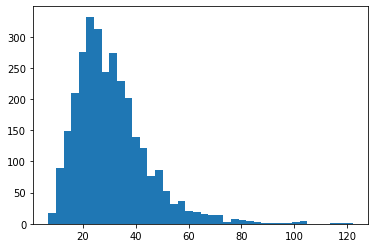

In [ ]:
# plota histograma
plt.hist(precos_fechamento,bins=40)

In [ ]:
# Analisa o resultado médio de todos os preços simulados
media_final = round(np.mean(precos_fechamento),2)
print("Preço Esperado: ", str(media_final))

Comparação com a cotação do dia anterior 27/12/2022 as 18:00h. Valor da ação = 25,11.
Custo medio =30,03.